# An example of Deep Learning Interpretability applied to Computer Vision
In this example, we are going to show 3 methods of Deep Learning Interpretability using a pretrained CNN network, more concretely VGG16.

**Author: Alberto Rivera Martínez**

Before running this notebook, please install the following dependencies: `numpy, tensorflow, cv2 and matplotlib`

You can also use Google Colab. If so, you don't need to install any package.

## 1. Load the VGG16 pretrained model

In [1]:
# Import all needed libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions
import cv2
# Custom classes for this notebook. They have been developed by Alberto Rivera
from Helpers import GradientAscent, GradCAM, ImageVisualizer

In [2]:
# Show GPU devices
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# Import VGG16 model
model = VGG16(include_top=True, weights="imagenet", classes=1000, classifier_activation="softmax", input_shape=(224, 224, 3))

# Show the summary of the model
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

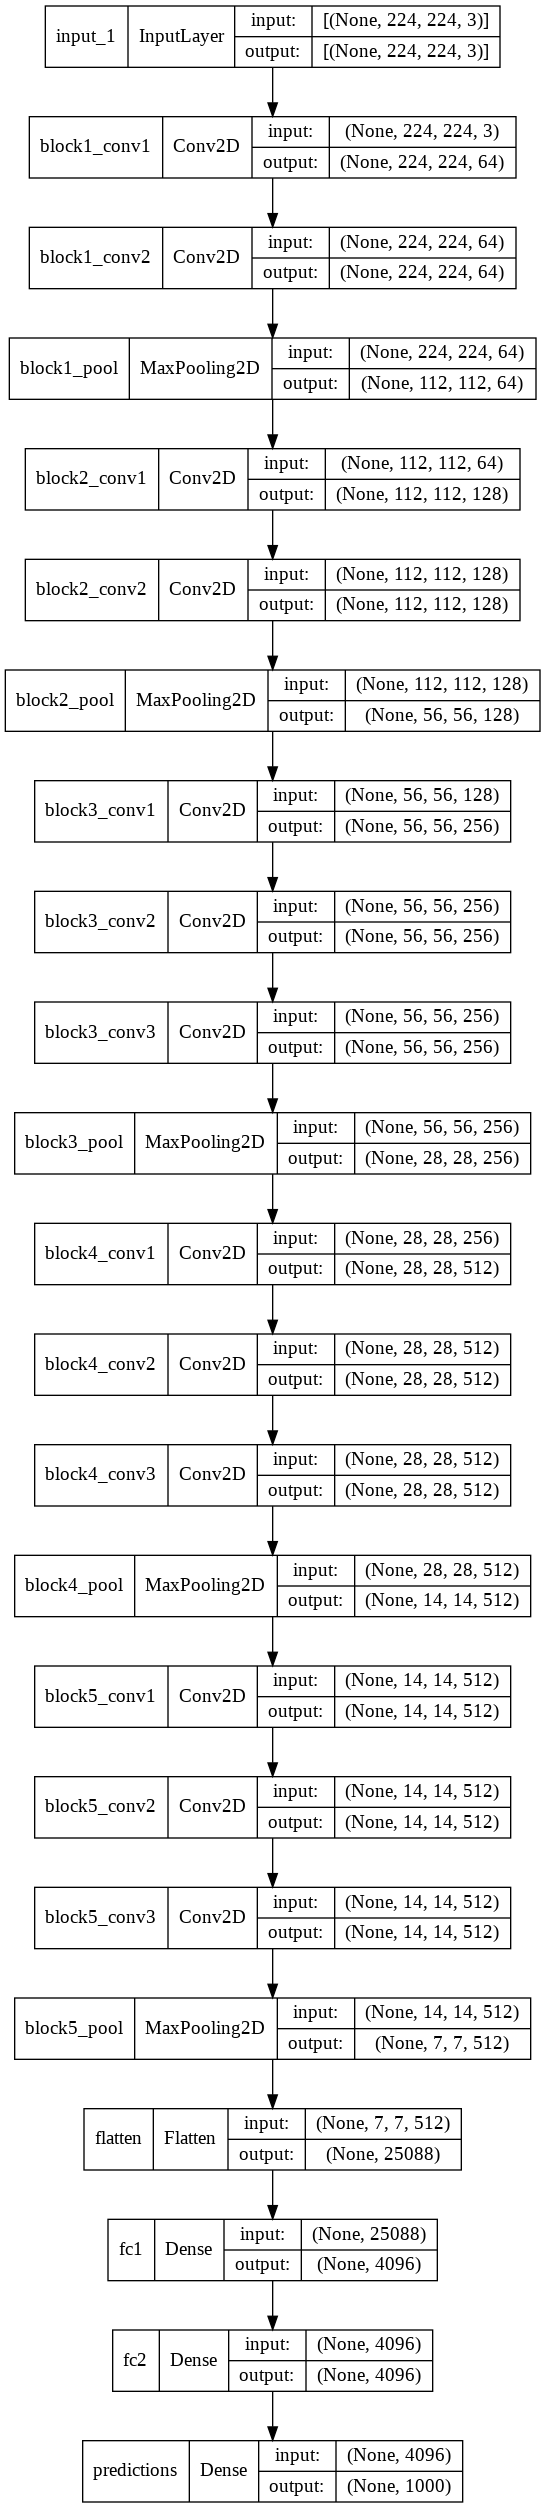

In [4]:
# Show the graph of the model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [5]:
# See all classes of the model
model_classes = decode_predictions(np.expand_dims(np.arange(1000), 0), top=1000)
model_classes

[[('n15075141', 'toilet_tissue', 999),
  ('n13133613', 'ear', 998),
  ('n13054560', 'bolete', 997),
  ('n13052670', 'hen-of-the-woods', 996),
  ('n13044778', 'earthstar', 995),
  ('n13040303', 'stinkhorn', 994),
  ('n13037406', 'gyromitra', 993),
  ('n12998815', 'agaric', 992),
  ('n12985857', 'coral_fungus', 991),
  ('n12768682', 'buckeye', 990),
  ('n12620546', 'hip', 989),
  ('n12267677', 'acorn', 988),
  ('n12144580', 'corn', 987),
  ('n12057211', "yellow_lady's_slipper", 986),
  ('n11939491', 'daisy', 985),
  ('n11879895', 'rapeseed', 984),
  ('n10565667', 'scuba_diver', 983),
  ('n10148035', 'groom', 982),
  ('n09835506', 'ballplayer', 981),
  ('n09472597', 'volcano', 980),
  ('n09468604', 'valley', 979),
  ('n09428293', 'seashore', 978),
  ('n09421951', 'sandbar', 977),
  ('n09399592', 'promontory', 976),
  ('n09332890', 'lakeside', 975),
  ('n09288635', 'geyser', 974),
  ('n09256479', 'coral_reef', 973),
  ('n09246464', 'cliff', 972),
  ('n09229709', 'bubble', 971),
  ('n091937

## 2. Visualize filters (synthetic images) learned by the model of a specific layer with Gradient Ascent in the Input Space

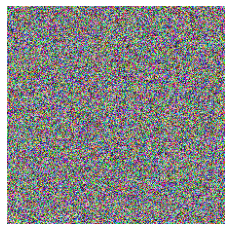

In [6]:
# Shape of the input image (used for filter vis and class vis methods)
input_shape = (224, 224, 3)

# NN layer for filters (used only for filters vis)
layer = 2

# Filter indexes of the previous specified layer (used only for filters vis)
# Note: layer 2 has 64 filters, as it can be seen in the model summary
filter_indexes = list(range(0, 64))

# Class indexes (used only for class vis)
# Note: apply it only to 10 first classes
class_indexes = list(range(0, 10))

# Initialize an initial noisy image
init_random_image = GradientAscent.get_random_initialized_image(input_shape)

# Visualize the initial image
ImageVisualizer.visualize_image(init_random_image)

In [7]:
# Compute gradient ascent in the input space (initial random image) maximizing the activations for each filter
gradient_ascent_actor = GradientAscent(model)
filters_losses, filters_images = gradient_ascent_actor.get_filters_layer(
    init_random_image, 
    layer, filter_indexes, 
    iterations=50, 
    learning_rate=15
)

INFO:tensorflow:Assets written to: ram://edc38547-3ef9-46d6-ab24-7a23c2a04780/assets


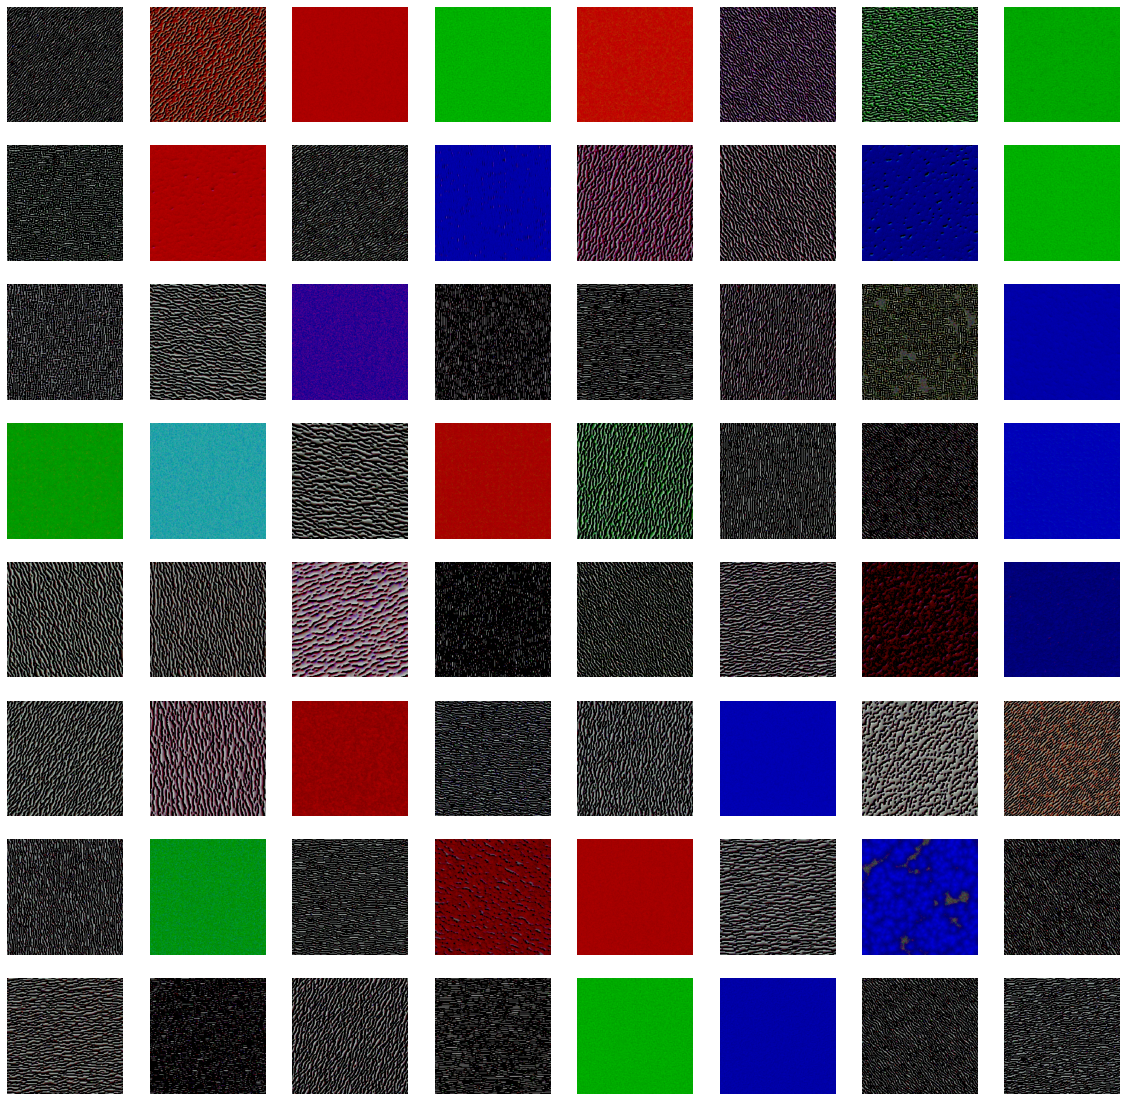

In [8]:
# See what filters has learned the Neural Network in that layer
result_images = []
for filter in filter_indexes:
  result_image = gradient_ascent_actor.deprocess_image(filters_images[filter, -1])
  result_images.append(result_image)
ImageVisualizer.visualize_multiple_images(np.array(result_images), 8, 8)

## 3. Class visualization with Gradient Ascent in Input Space 

In [9]:
# Compute gradient ascent in the input space (initial random image) maximizing the activations for each class
classes_losses, classes_images = gradient_ascent_actor.get_class(init_random_image, class_indexes, iterations=60, learning_rate=15)

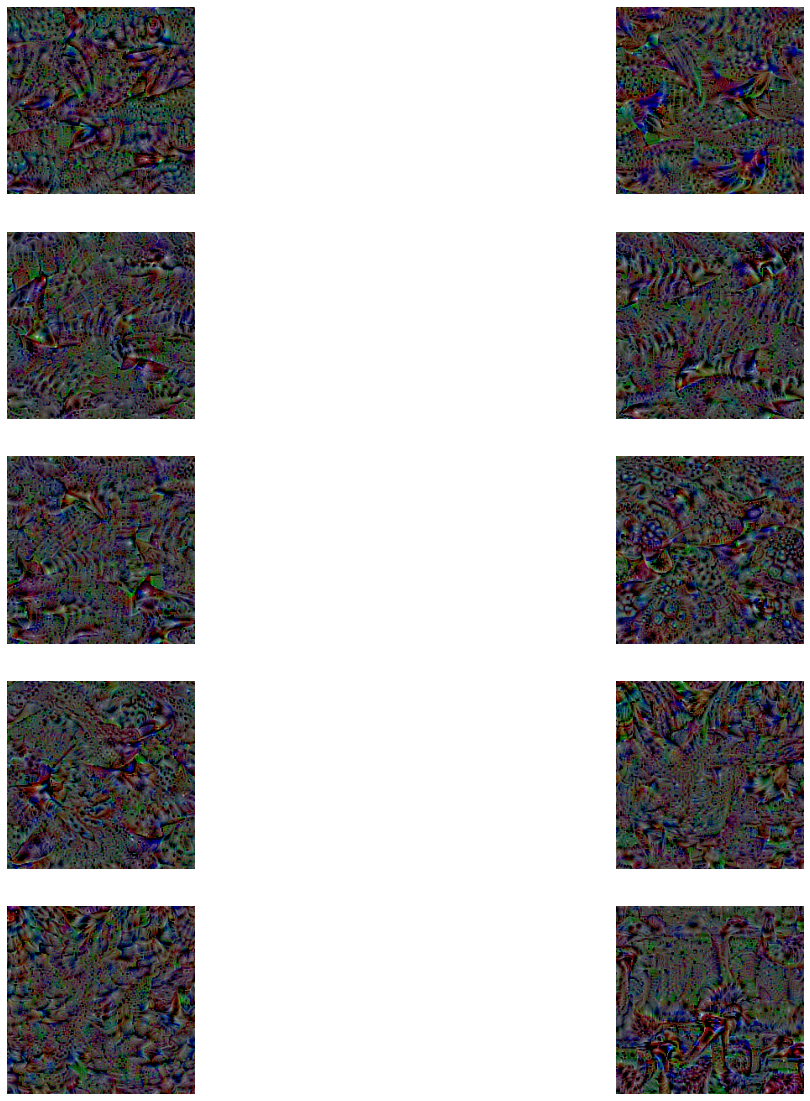

In [10]:
# See what filters has learned the Neural Network in that layer
result_images = []
for class_index in class_indexes:
  result_image = gradient_ascent_actor.deprocess_image(classes_images[class_index, -1])
  result_images.append(result_image)
ImageVisualizer.visualize_multiple_images(np.array(result_images), 5, 2)

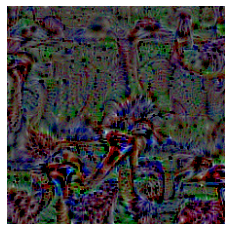

In [11]:
ImageVisualizer.visualize_image(result_images[9])

## 4. Visualizing at what features a specific layer is paying more attention to classify the image using GradCAM

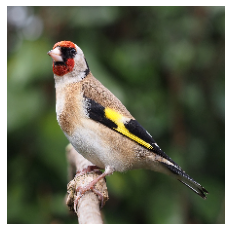

In [12]:
image_path = 'input_images/goldfinch.jpg'

# Load the input image and resize it
input_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
input_image = cv2.resize(input_image, dsize=input_shape[:-1])

# Change bgr to rgb
b, g, r = cv2.split(input_image)
image_rgb = cv2.merge([r, g, b])

# BGR and zero center
image_bgr = tf.keras. applications.vgg16.preprocess_input(image_rgb)

# Visualize the image in RGB
ImageVisualizer.visualize_image(image_rgb)

In [13]:
# Get the prediction of the model
prediction = model.predict(np.array([image_bgr]))[0]
predicted_class = np.argmax(prediction)
string_predicted_class = model_classes[0][1000-predicted_class-1][1]
prediction_confidence = np.max(prediction)

print(f'The model has predicted that the input image is {string_predicted_class} (with the index {predicted_class}) with the following confidence: {prediction_confidence}')

The model has predicted that the input image is goldfinch (with the index 11) with the following confidence: 0.9625183343887329


In [14]:
# Use a deep layer. Deeper layers learn high-level features
layer = 16

# Compute GradCAM and get heatmap with the most important features that the layer is looking at
grad_cam_actor = GradCAM(model)
heatmap = grad_cam_actor.compute_grad_CAM(image_bgr, layer)
heatmap = grad_cam_actor.compute_heatmap_postprocessing(heatmap, input_shape[:-1])

INFO:tensorflow:Assets written to: ram://2e6319f4-7e92-4219-a265-f08d21219e63/assets


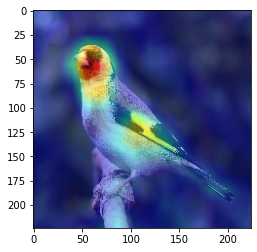

In [15]:
# Visualize the heatmap over the image
result = ImageVisualizer.visualize_grad_CAM(heatmap, image_rgb, alpha=0.4)

## 5. Visualizing most important features used by the model to classify the image using GradCAM

In [16]:
# Compute GradCAM and get heatmap with the most important features that the Neural Network is using to classify the image
heatmap = grad_cam_actor.compute_grad_CAM_all_conv_layers(image_bgr)
heatmap = grad_cam_actor.compute_heatmap_postprocessing(heatmap, input_shape[:-1])

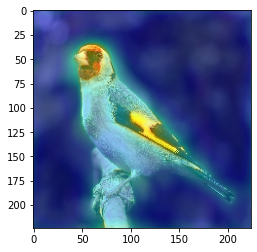

In [17]:
# Visualize the heatmap over the image
result = ImageVisualizer.visualize_grad_CAM(heatmap, image_rgb, alpha=0.4)

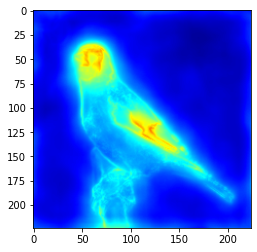

In [18]:
# Visualize the heatmap without the original image
heatmap = ImageVisualizer.visualize_grad_CAM(heatmap, alpha=0.4)

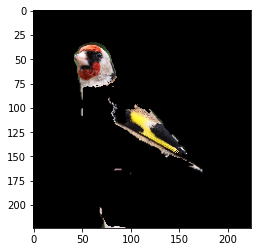

In [19]:
# Apply a binary mask to the original image setting a threshold to select the most important featues of the image
ImageVisualizer.visualize_important_segments_heatmap(heatmap, image_rgb, threshold_r=50)